Importo Librerías

In [1]:
# Ignoro warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# Bibliotecas para manipulación de datos y visualización
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

# Importo Modelo de Regresión Logistica
from sklearn.linear_model import LogisticRegression

#Importo bibliotecas para preprocesamiento
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder,OneHotEncoder #Imputer,

#Importo Parametros para evaluación de parametros y del modelo
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score, classification_report


#Seteo opciones de pandas para evitar truncar columnas/filas
pd.set_option('display.max_columns', None) #evitar truncar columnas
pd.set_option('display.max_rows', None) #evitar truncar filas

In [2]:
df=pd.read_csv(r'PeopleAnalytics-Attrition.csv', sep=',')

In [3]:
print("numero de registros: ",df.shape[0])
print("numero de variables: ",df.shape[1])

numero de registros:  1470
numero de variables:  35


In [4]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [5]:
#Chequeo si hay nulos
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Observamos que las variables Education, EnvironmentSatisfaction, JobInvolvement, JobLevel, StockOptionLevel y WorkLifeBalance estan como numero, cuando en realidad hacen referencia a categorías.

In [6]:
#convertimos el tipo de dato a objeto
df['Education'] = df['Education'].astype(object)
df['EnvironmentSatisfaction'] = df['EnvironmentSatisfaction'].astype(object)
df['JobInvolvement'] = df['JobInvolvement'].astype(object)
df['JobLevel'] = df['JobLevel'].astype(object)
df['StockOptionLevel'] = df['StockOptionLevel'].astype(object)
df['WorkLifeBalance'] = df['WorkLifeBalance'].astype(object)
#chequeamos si quedo como objeto
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   object
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   object
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   object
 14  JobLevel                

### Analisis de datos continuo:

In [7]:
#Realizo Analisis Univariado
df.describe()

,Age,DailyRate,DistanceFromHome,EmployeeCount,EmployeeNumber,HourlyRate,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,1.0,1024.865306,65.891156,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,11.279592,2.799320,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,0.0,602.024335,20.329428,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,7.780782,1.289271,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.0,1.000000,30.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,1.0,491.250000,48.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,1.0,1020.500000,66.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,1.0,1555.750000,83.750000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,1.0,2068.000000,100.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,40.000000,6.000000,40.000000,18.000000,15.000000,17.000000


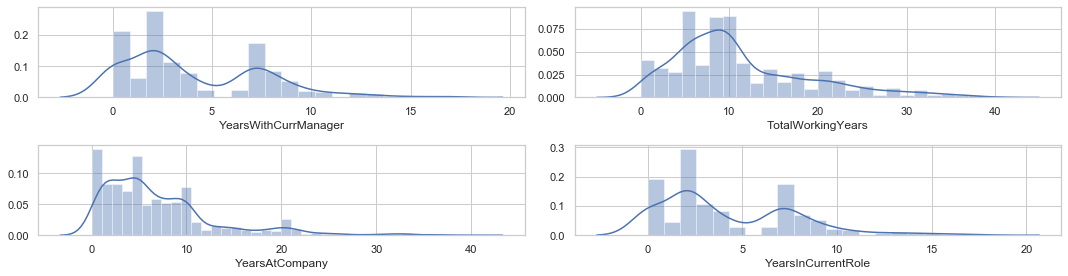

In [8]:
# Evaluando algunas variables historicas de los empleados en con la empresa:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

fig,ax = plt.subplots(2,2, figsize=(15,4))                
sns.distplot(df['YearsWithCurrManager'], ax = ax[0,0]) 
sns.distplot(df['TotalWorkingYears'], ax = ax[0,1]) 
sns.distplot(df['YearsAtCompany'], ax = ax[1,0]) 
sns.distplot(df['YearsInCurrentRole'], ax = ax[1,1]) 
plt.tight_layout()
plt.show()

Podemos ver que la mayoria de los empleados tienen menos de 10 años en la empresa, en su mayoría solamente en nuestra empresas y que hay una correlacion interesante entre tiempo en el mismo rol y tiempo con el mismo jefe.

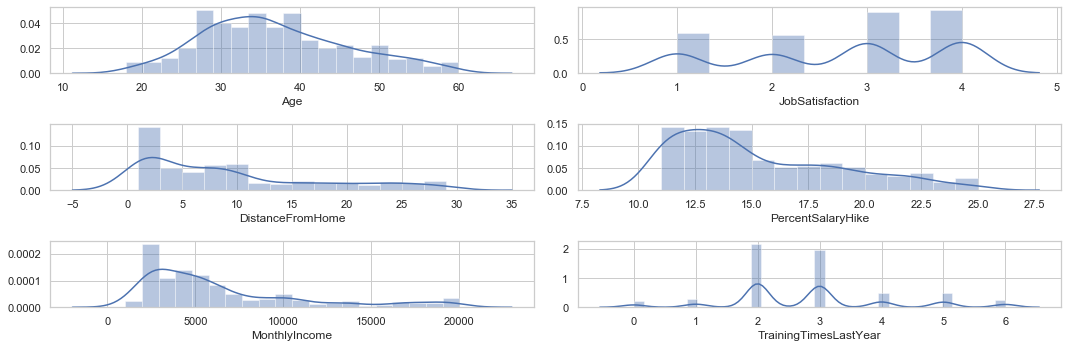

In [9]:
# Evaluando algunas variables (Analisis Exploratorio):
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

fig,ax = plt.subplots(3,2, figsize=(15,5))                
sns.distplot(df['Age'], ax = ax[0,0]) 
sns.distplot(df['JobSatisfaction'], ax = ax[0,1]) 
sns.distplot(df['DistanceFromHome'], ax = ax[1,0]) 
sns.distplot(df['PercentSalaryHike'], ax = ax[1,1]) 
sns.distplot(df['MonthlyIncome'], ax = ax[2,0]) 
sns.distplot(df['TrainingTimesLastYear'], ax = ax[2,1]) 
plt.tight_layout()
plt.show()

La mayoría de nuestros empleados tienen entre 30 y 40 años. En general una satisfaccion buena, con gente que vive cerca del trabajo y que la mayoría tiene capacitaciones en los últimos 2 años.

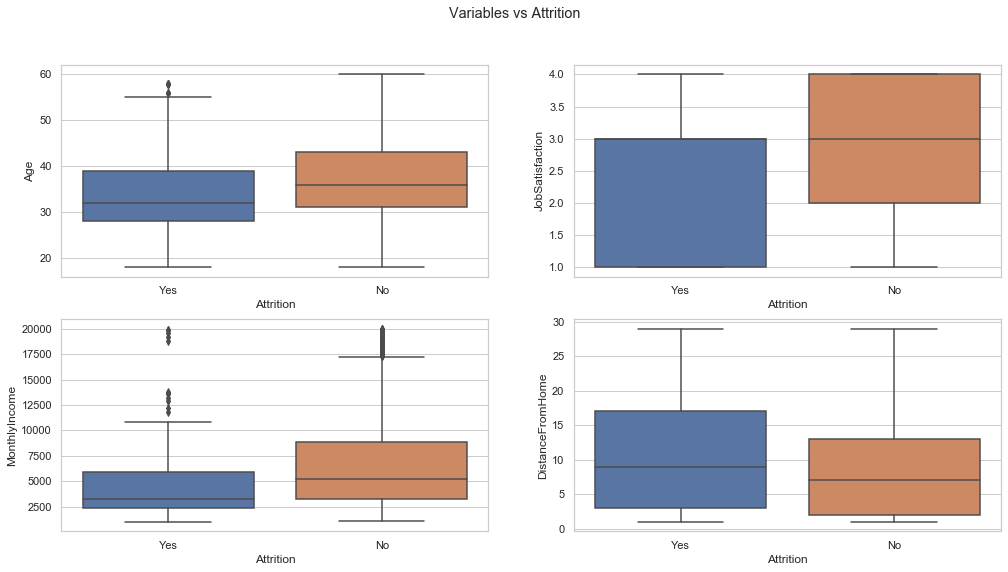

In [10]:
#Evaluo Variables vs Attrition:
fig, axes = plt.subplots(2, 2, figsize=(15, 8))
fig.suptitle('Variables vs Attrition')
sns.boxplot(ax=axes[0, 0], data=df, x='Attrition', y='Age')
sns.boxplot(ax=axes[0, 1], data=df, x='Attrition', y='JobSatisfaction')
sns.boxplot(ax=axes[1, 0], data=df, x='Attrition', y='MonthlyIncome')
sns.boxplot(ax=axes[1, 1], data=df, x='Attrition', y='DistanceFromHome')

Obervamos entonces que las variables edad, sueldo, satisfaccion y distancia al trabajo influyen en el abandono de la empresa.

### Analisis de datos categóricos:

Analicemos ahora las diversas características categóricas.En estos casos, generalmente la mejor manera es usar un conteo para mostrar el conteo relativo de observaciones de diferentes categorías.

Porcentaje de gente que se va: 
 No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64


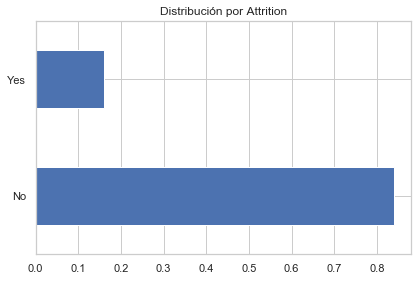

In [11]:
#Calculemos el porcentaje de cada categoría para la variable Attrition.
print("Porcentaje de gente que se va: \n", df.Attrition.value_counts(normalize=True))
#Grafico de barras con porcentaje de cada categoria:
df.Attrition.value_counts(normalize=True).plot.barh(grid=True).set_title('Distribución por Attrition')
plt.show()

Observamos que cerca del 17% de los empleados se van.

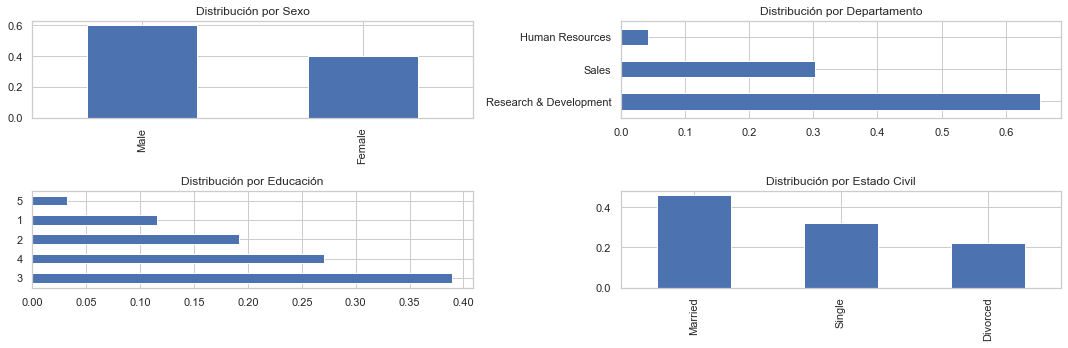

In [12]:
#Calculemos el porcentaje de cada categoría para la variable Sexo.
df.Gender.value_counts(normalize=True)
#Calculemos el porcentaje de cada categoría para la variable Departamento.
df.Department.value_counts(normalize=True)
#Calculemos el porcentaje de cada categoría para la variable Educación.
df.Education.value_counts(normalize=True)
#Calculemos el porcentaje de cada categoría para la variable Estado Civil.
df.MaritalStatus.value_counts(normalize=True)

fig = plt.figure(figsize=[15,5])
# Divido las figuras en 4 (2x2 y luego asigno la subfigura 1 a 4 en cada caso
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)


df.Gender.value_counts(normalize=True).plot.bar(grid=True, ax=ax1).set_title('Distribución por Sexo')
df.Department.value_counts(normalize=True).plot.barh(grid=True, ax=ax2).set_title('Distribución por Departamento')
df.Education.value_counts(normalize=True).plot.barh(grid=True, ax=ax3).set_title('Distribución por Educación')
df.MaritalStatus.value_counts(normalize=True).plot.bar(grid=True, ax=ax4).set_title('Distribución por Estado Civil')
plt.tight_layout()

Podemos observar la distribución de nuestros empleados: en su mayoría hombres, del Departamento de Investigacion, con nivel de educación 3 y casados.

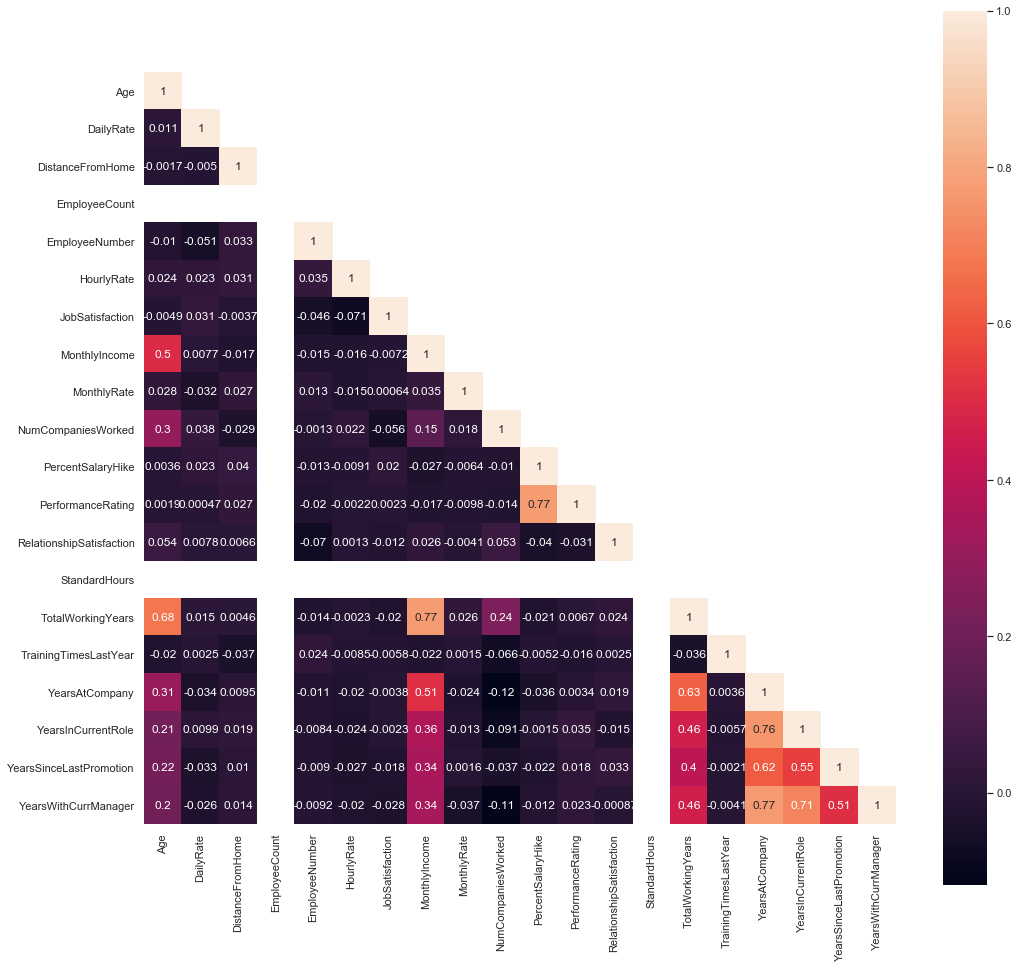

In [13]:
#Evaluo Correlacion de Variables
cor_mat= df.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(15,15)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

ALGUNAS INFERENCIAS DEL HEATMAP ANTERIOR:
1. JobLevel está altamente relacionado con la edad, como se espera, ya que los empleados de edad generalmente tienden a ocupar puestos más altos en la empresa.
1. MonthlyIncome está muy fuertemente relacionado con el nivel de negocios como se espera, ya que los empleados senior definitivamente ganarán más.
3. PerformanceRating está altamente relacionado con PercentSalaryHike, que es bastante obvio.
4. También tenga en cuenta que TotalWorkingYears está altamente relacionado con JobLevel, que se espera que los empleados senior deban haber trabajado durante un período de tiempo mayor.
5. YearsWithCurrManager está altamente relacionado con YearsAtCompany.
6. YearsAtCompany está relacionada con YearsInCurrentRole.
7. Tenga en cuenta que podemos eliminar algunas funciones altamente relacionadas, ya que agregan redundancia al modelo, pero como la relación es muy inferior en general, dejemos todas las funciones por ahora. En el caso de funciones altamente relacionadas, podemos usar algo como Análisis de componentes principales (PCA) para reducir nuestro espacio de funciones.

### Generar un modelo de regresion logística:

In [14]:
# Trasnformo las variables categóricas a numericas:
#genero funcion que encodea
def transform(feature):
    le=LabelEncoder()
    df[feature]=le.fit_transform(df[feature])
    print(le.classes_)

cat_df=df.select_dtypes(include='object')
cat_df.columns

#Transformo las variables
for col in cat_df.columns:
    transform(col)
df.head() # Verifico.

['No' 'Yes']
['Non-Travel' 'Travel_Frequently' 'Travel_Rarely']
['Human Resources' 'Research & Development' 'Sales']
[1 2 3 4 5]
['Human Resources' 'Life Sciences' 'Marketing' 'Medical' 'Other'
 'Technical Degree']
[1 2 3 4]
['Female' 'Male']
[1 2 3 4]
[1 2 3 4 5]
['Healthcare Representative' 'Human Resources' 'Laboratory Technician'
 'Manager' 'Manufacturing Director' 'Research Director'
 'Research Scientist' 'Sales Executive' 'Sales Representative']
['Divorced' 'Married' 'Single']
['Y']
['No' 'Yes']
[0 1 2 3]
[1 2 3 4]


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,1,1,1,1,1,0,94,2,1,7,4,2,5993,19479,8,0,1,11,3,1,80,0,8,0,0,6,4,0,5
1,49,0,1,279,1,8,0,1,1,2,2,1,61,1,1,6,2,1,5130,24907,1,0,0,23,4,4,80,1,10,3,2,10,7,1,7
2,37,1,2,1373,1,2,1,4,1,4,3,1,92,1,0,2,3,2,2090,2396,6,0,1,15,3,2,80,0,7,3,2,0,0,0,0
3,33,0,1,1392,1,3,3,1,1,5,3,0,56,2,0,6,3,1,2909,23159,1,0,1,11,3,3,80,0,8,3,2,8,7,3,0
4,27,0,2,591,1,2,0,3,1,7,0,1,40,2,0,2,2,1,3468,16632,9,0,0,12,3,4,80,1,6,3,2,2,2,2,2


In [15]:
#Escalo las variables
scaler=StandardScaler()
scaled_df=scaler.fit_transform(df.drop('Attrition',axis=1))
X=scaled_df
Y=df['Attrition']

In [16]:
#Separo en train y test:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [17]:
#Entreno y predigo con el modelo:
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)
predictions = logmodel.predict(x_test)

In [18]:
#Evaluo el modelo:
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

0.8913043478260869
[[313   7]
 [ 33  15]]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       320
           1       0.68      0.31      0.43        48

    accuracy                           0.89       368
   macro avg       0.79      0.65      0.68       368
weighted avg       0.88      0.89      0.87       368



Orignalmente el 17% de la gente se iba. Encontre un modelo que me predice con casi un 90% de acierto quien va a irse de la empresa y quien no. Es mejor que lo que originalmente teníamos que era "todos se quedan" lo que daba un 83% de acierto.

Esto implica que podría realizar una campaña de retención sobre los empleados que iban a irse de la empresa y, si funciona, podría generar aproximadamente un 30% de retención de los mismos.